# Car price Prediction.

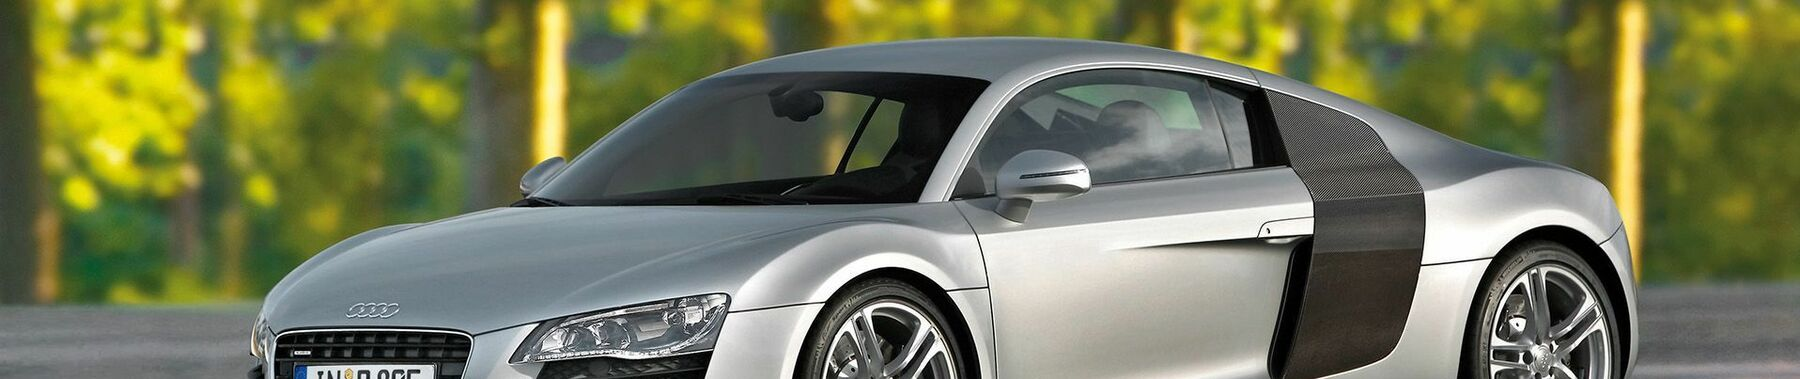

## Introduction :

#### About Dataset
##### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, to meet certain price levels and to know specifically where the various factors affect for the production and for the price. Which will also make company to understand the dynamics of market related to the others. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Basically, our Aim is to understand the factors on which the price of cars depends.
In other words, which factors(specially independent features) make the prices go up. And also providing us with the overview of deciding the reasonable prices, which the normal or any class family can purchase,that also includes the affordable prices for them with resonable features.

So to objectify this, we will be using two of our models ie, Linear Regression and Lasso Regression, And then we will be comparing the results of both the models to check for the better performance and accuracy(R-squared score which is also the standardize version of Mean Squared Error) by plotting the graph between them.

###### Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

### Importing Dependencies .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Dictionary:

1	Car_ID	-----		Unique id of each observation (Interger)		
2	Symboling -----			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany -----			Name of car company (Categorical)		
4	fueltype  -----			Car fuel type i.e gas or diesel (Categorical)		
5	aspiration -----		Aspiration used in a car (Categorical)		
6	doornumber -----			Number of doors in a car (Categorical)		
7	carbody	-----		body of car (Categorical)		
8	drivewheel  -----			type of drive wheel (Categorical)		
9	enginelocation-----			Location of car engine (Categorical)		
10	wheelbase -----			Weelbase of car (Numeric)		
11	carlength -----			Length of car (Numeric)		
12	carwidth -----			Width of car (Numeric)		
13	carheight -----			height of car (Numeric)		
14	curbweight -----			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype -----			Type of engine. (Categorical)		
16	cylindernumber -----			cylinder placed in the car (Categorical)		
17	enginesize -----			Size of car (Numeric)		
18	fuelsystem -----			Fuel system of car (Categorical)		
19	boreratio -----			Boreratio of car (Numeric)		
20	stroke -----			Stroke or volume inside the engine (Numeric)		
21	compressionratio -----			compression ratio of car (Numeric)		
22	horsepower -----			Horsepower (Numeric)		
23	peakrpm -----			car peak rpm (Numeric)		
24	citympg -----			Mileage in city (Numeric)		
25	highwaympg -----		Mileage on highway (Numeric)		
26	price(Dependent variable) -----			Price of car (Numeric)		


#### Loading the dataset

In [2]:
df1 = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df1.head() 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data preprocessing

In [4]:
df1.shape

(205, 26)

In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df1.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

We notice that, there is no missing data present in our dataset, Therefore there is no need of any kind of replacement or the manipulation of the data.

Let's move further with some statiscal measures of the numerical data.

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### Data Analysis :

We see that,there are total 9 categorical features in our dataset, which needs to be encoded.

Below is the count of the categories of the categorical data

In [8]:
# Checking the distribution of categorical data.
print(df1.fueltype.value_counts())
print(df1.aspiration.value_counts())
print(df1.doornumber.value_counts())
print(df1.carbody.value_counts())
print(df1.drivewheel.value_counts())
print(df1.enginelocation.value_counts())
print(df1.enginetype.value_counts())
print(df1.cylindernumber.value_counts())
print(df1.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


##### Exploratory Data Analysis:

In [9]:
#Excluding the columns which are not much necessary.
df1=df1.drop(columns=['car_ID','CarName'],axis=1)

In [10]:
# Checking the distribution of Categorical data:
categorical_feature = [feature for feature in df1.columns if df1[feature].dtypes=='O' ]
print(categorical_feature)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


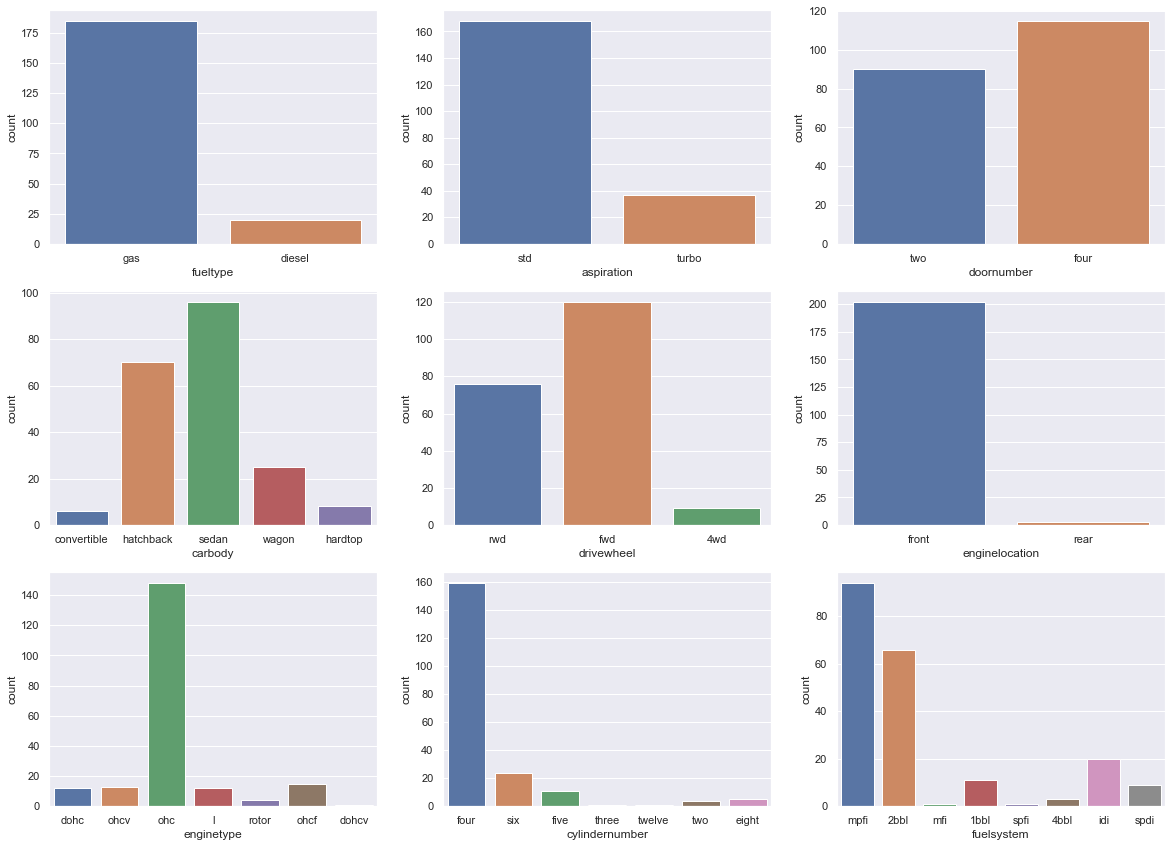

In [11]:
sns.set_theme()
features=[i for i in (df1.iloc[:,1:-1]).columns if df1[i].dtypes=='object' ]
i = 1
plt.figure(figsize=(20,25))
for j in features:
    plt.subplot(5, 3, i)
    sns.countplot(x=j,data=df1,palette='deep')
    plt.xlabel(j)
    i += 1
plt.show()

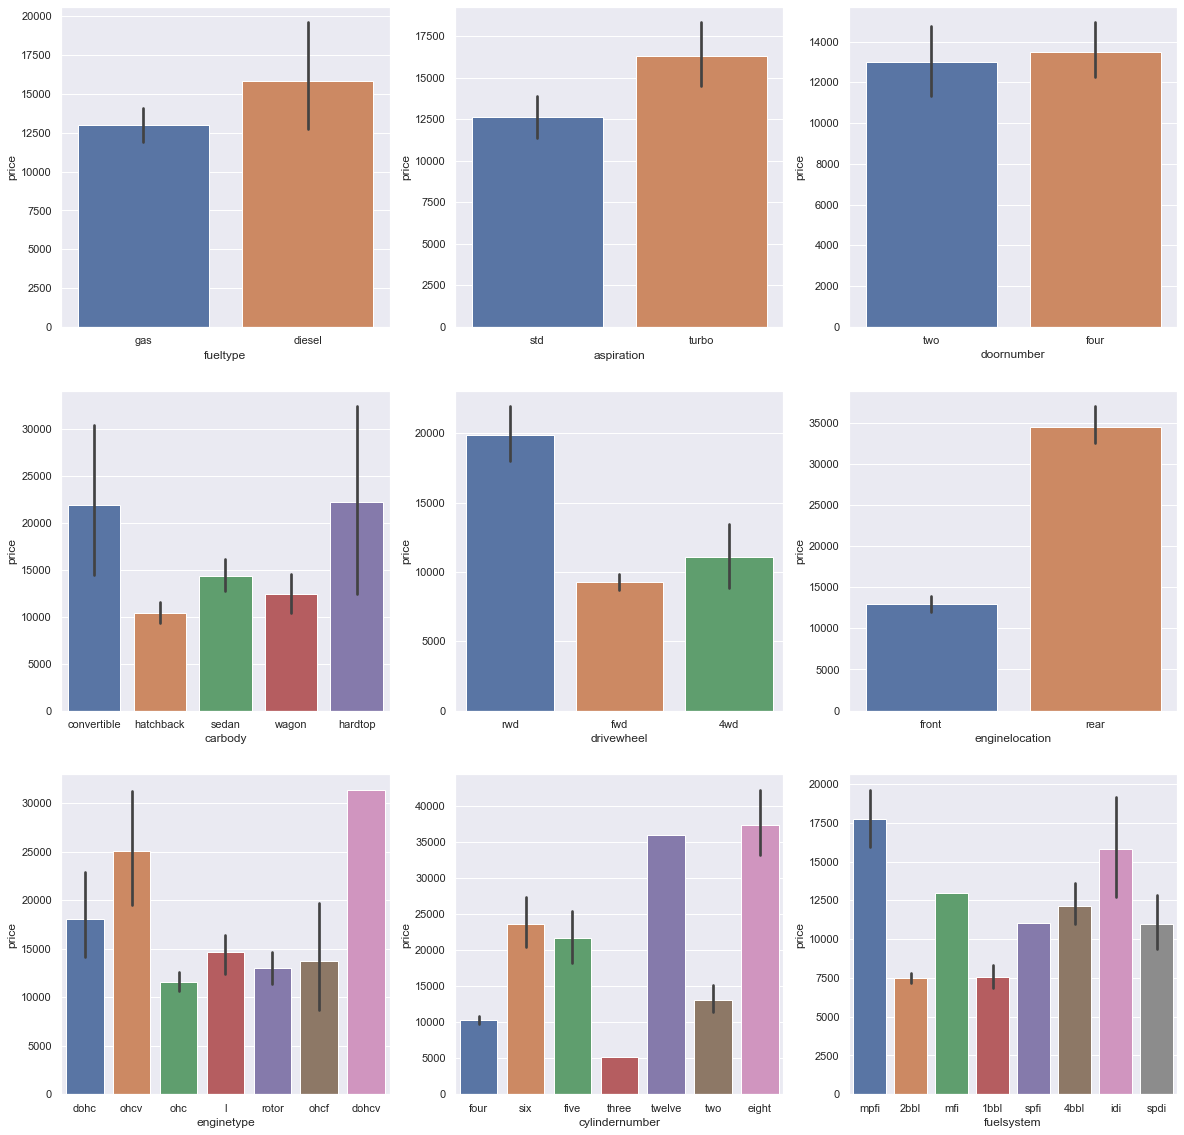

In [12]:
plt.figure(figsize=(20,20))

for i, col in enumerate(list(categorical_feature), 1):
    plt.subplot(3,3,i)
    sns.barplot(x=col,y='price',data=df1)

1) Doornumber doesnot impact the price. As there is not much difference in price range between both the category 2 doors & 4 doors.

2) In Aspiration feature, turbo have higher price range than the std. std category has some outliers compare to turbo.

3) In Enginelocation categories rear starting price range is heigher than front location. Most preffered are front location one.

4) Eight cylinders cars have the highest price range. Most preffered are Six, Five & Four in order.

5) mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.

6) A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


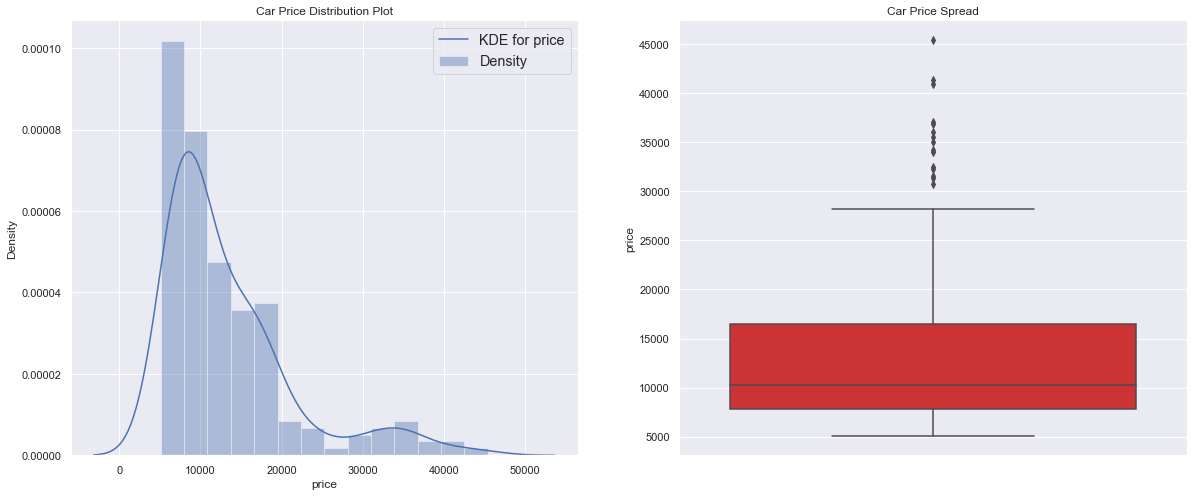

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot((df1.price),color='b')
plt.legend(labels=['KDE for price','Density'],fontsize = 'large')

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df1.price,palette='Set1')

plt.show()

#### Encoding the categorical data

Let's encode the categories of the categorical data.


In [14]:
df1.replace({'fueltype':{'gas':0,'diesel':1}},inplace = True)
df1.replace({'aspiration':{'std':0,'turbo':1}},inplace = True)
df1.replace({'doornumber':{'four':0,'two':1}},inplace = True)
df1.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace = True)
df1.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace = True)
df1.replace({'enginelocation':{'front':0,'rear':1}},inplace = True)
df1.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace = True)
df1.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace = True)
df1.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace = True)

In [15]:
df1

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,1,4,1,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,1,4,1,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,1,1,1,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,0,0,0,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,0,0,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,0,0,1,0,109.1,188.8,68.9,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,0,1,0,0,1,0,109.1,188.8,68.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,0,0,0,1,0,109.1,188.8,68.9,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,1,0,0,1,0,109.1,188.8,68.9,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

As we encoded all our categorical features into the numerical data, We see that now all our features are in the numerical form.
Which is a good take for our machine learning model.

Now further let's check the correlation of all the features present in our model.

In [17]:
# Now lets check for the correlation of the data.
df1.corr()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.194311,-0.059866,0.664073,0.301354,-0.111150,0.212471,-0.531954,-0.357612,-0.232919,...,-0.105790,0.155724,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.194311,1.000000,0.401397,-0.191491,-0.106275,0.051874,-0.040070,0.308346,0.212679,0.233880,...,0.069594,0.254827,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.401397,1.000000,-0.031792,-0.055455,0.153897,-0.057191,0.257611,0.234539,0.300567,...,0.108217,0.266364,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.191491,-0.031792,1.000000,0.340507,-0.004549,0.137757,-0.447357,-0.398568,-0.207168,...,-0.020742,0.165059,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.301354,-0.106275,-0.055455,0.340507,1.000000,0.178462,0.309907,-0.170051,-0.071322,-0.045453,...,0.104722,-0.054393,0.154351,-0.092747,-0.105144,0.129639,0.006010,-0.137525,-0.143814,0.107031
drivewheel,-0.111150,0.051874,0.153897,-0.004549,0.178462,1.000000,0.113823,0.366828,0.416076,0.376554,...,0.409914,-0.207202,0.512709,-0.192827,0.018903,0.445806,-0.139905,-0.503655,-0.549492,0.490739
enginelocation,0.212471,-0.040070,-0.057191,0.137757,0.309907,0.113823,1.000000,-0.187790,-0.050989,-0.051698,...,0.196826,-0.092625,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.308346,0.257611,-0.447357,-0.170051,0.366828,-0.187790,1.000000,0.874587,0.795144,...,0.569329,-0.229733,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.212679,0.234539,-0.398568,-0.071322,0.416076,-0.050989,0.874587,1.000000,0.841118,...,0.683360,-0.310001,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.233880,0.300567,-0.207168,-0.045453,0.376554,-0.051698,0.795144,0.841118,1.000000,...,0.735433,-0.220772,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


Here, we have the correlation of all the features with respect to the Heatmap.

<AxesSubplot:>

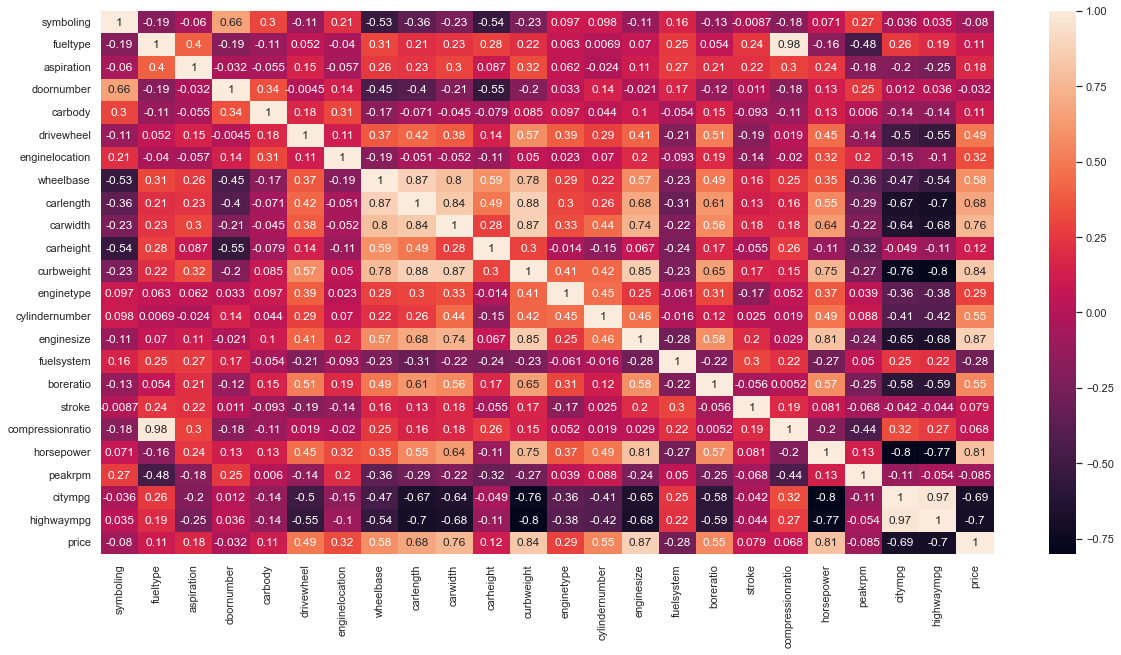

In [18]:
plt.subplots(figsize = (20,10))
sns.heatmap(df1.corr(),annot = True,cbar = True)

- wheelbase has high positive correlation with carlength,carwidth and curbweight
- carlength has high postive correlation with curbweight
- carlength has negative correlation with highwaympg
- carwidth has high postive correlation with curbweight and engine size
- enginesize has high positive correlation with horsepower
- curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
- horsepower has negative correlation with citympg and highwaympg
- citympg and highwaympg are highly correlated

#### Splitting the data and target into 'x' and 'y' respectively.

In [19]:
x = df1.drop(columns= 'price',axis = 1)
y = df1['price']

In [20]:
print(x)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         0           0           1        4           1   
1            3         0           0           1        4           1   
2            1         0           0           1        1           1   
3            2         0           0           0        0           0   
4            2         0           0           0        0           2   
..         ...       ...         ...         ...      ...         ...   
200         -1         0           0           0        0           1   
201         -1         0           1           0        0           1   
202         -1         0           0           0        0           1   
203         -1         1           1           0        0           1   
204         -1         0           1           0        0           1   

     enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
0                 0       88.6      168.8      

In [21]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


#### Feature scaling with MinMaxScaler.

##### MinMax Scaler:
The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively. While the StandardScaler scales all values between min and max so that they fall within a range from min to max.

It transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(copy = True , feature_range = (0,1))

In [24]:
X = scaler.fit_transform(x)

In [25]:
print('x \n',X[:10])
print('y \n',y[:10])

x 
 [[1.         0.         0.         1.         1.         0.5
  0.         0.05830904 0.41343284 0.31666667 0.08333333 0.41117145
  0.5        0.         0.26037736 0.         0.66428571 0.29047619
  0.125      0.2625     0.34693878 0.22222222 0.28947368]
 [1.         0.         0.         1.         1.         0.5
  0.         0.05830904 0.41343284 0.31666667 0.08333333 0.41117145
  0.5        0.         0.26037736 0.         0.66428571 0.29047619
  0.125      0.2625     0.34693878 0.22222222 0.28947368]
 [0.6        0.         0.         1.         0.25       0.5
  0.         0.2303207  0.44925373 0.43333333 0.38333333 0.51784329
  0.33333333 0.16666667 0.34339623 0.         0.1        0.66666667
  0.125      0.44166667 0.34693878 0.16666667 0.26315789]
 [0.8        0.         0.         0.         0.         0.
  0.         0.38483965 0.52985075 0.49166667 0.54166667 0.32932506
  0.         0.         0.18113208 0.         0.46428571 0.63333333
  0.1875     0.225      0.55102041 

### Train - Test Split
Splitting the data into training and test data, with the test size of 30% and 0 random state.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
print('x shape is: ',x.shape)
print('y shape is: ',y.shape)

x shape is:  (205, 23)
y shape is:  (205,)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,random_state = 42)

In [29]:
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

x_train shape is:  (175, 23)
x_test shape is:  (30, 23)
y_train shape is:  (175,)
y_test shape is:  (30,)


### Model Training
Lets train our model with the help of Linear Regression.

##### Linear regression
Linear regression analysis is used to predict the value of a variable based on the value of another variable, or any continuos values or variables.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Loading the linear regression model:
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation 

Let's Evaluate our model with training and test data.
Following up with the predictions of prices with training data.

In [33]:
# Prediction on Training data:
train_data_predictions = model.predict(x_train)

In [34]:
train_data_predictions

# So these are the prices we predicted by our training data.

array([27098.29885197,  7125.18857917,  7770.67796111, 22973.34751008,
        7760.16466427, 26451.34627921, 12558.75525388, 10918.95678807,
        6254.69672212, 15042.34461736,  8396.40658325, 15000.44044645,
       16430.47969607,  6407.84260505,  6249.73264109,  8914.9330439 ,
        7125.18857917,  7011.94537553, 17085.8922041 , 13897.99525925,
        6110.74185253, 19691.58387105,  7027.43312797,  9207.69856424,
        6127.07422926, 17414.39041808, 13487.59553129, 10918.95678807,
       34655.622279  ,  6717.53403559,  9747.6725656 , 20226.67470299,
        9751.23188517, 18575.0116322 , 11214.62260391,  5973.3332626 ,
       16512.88601576,  6898.32598948, 18774.09591326,  9695.1803922 ,
        6978.01423825, 13390.94679383,  9009.76915949,  5644.23896219,
       18018.87054703,  8942.1485817 , 10065.7084168 , 15382.79532911,
        7671.11525721,  7880.4282455 ,  7188.681278  , 13550.35173114,
       18863.70758523, 18209.01504016, 15339.14618457,  7439.36424146,
      

##### R squared error

R-Squared is also termed the standardized version of MSE(Mean Squared Error). R-squared represents the fraction of variance of the actual value of the response variable captured by the regression model rather than the MSE which captures the residual error.

In [35]:
from sklearn import metrics

In [36]:
error_score1 = metrics.r2_score(y_train,train_data_predictions)
print('R Squared error is: ',error_score1)

R Squared error is:  0.9083454581006158


So we get, the predictions of our training data with respect to the actual data is almost 91%.
As, the R-Squared value is above 0.9, it shows our model is performing good with predictions with respect to actual data.

Another important way to check the performance of model is:- to plot the values of the training data prediction with actual data.

##### Visualize the actual prices and the predicted prices.

Text(0.5, 1.0, 'Actual Price vs. Predicted Price')

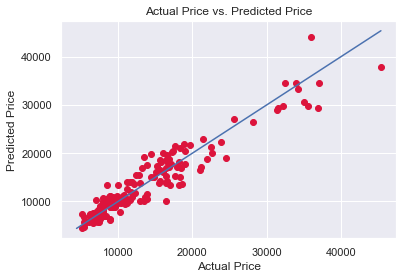

In [37]:
plt.scatter(x=y_train, y=train_data_predictions,c='crimson')
p1 = max(max(train_data_predictions), max(y_train))
p2 = min(min(train_data_predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

- As we can see , most of the values are closer to each other,
But as the price increase there is some distance between the points because as we can see price of the car are in the range,or within the range till the affordable price,and there are very less cars which are more than the affordable prices.
so as we can see the price the model predicted with the actual price are quite similar and so we can say.
our model is performing quite well.


######  Now lets Evaluate the model with test data.

In [38]:
test_data_predictions = model.predict(x_test)

##### R squared error for test data

In [39]:
error_score = metrics.r2_score(y_test,test_data_predictions)
print('The R squared score is: ',error_score)

The R squared score is:  0.8366575900318188


So the values we evaluated for the test data is quite similar to actual test values .
Lets plot for the test data .

Text(0.5, 1.0, 'Actual Price vs. Predicted Price')

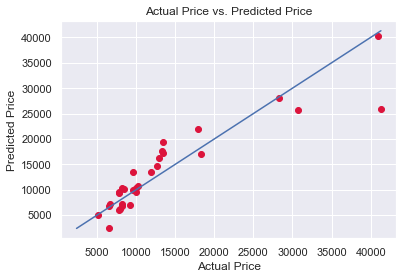

In [40]:
plt.scatter(x=y_test, y=test_data_predictions,c='crimson')
p1 = max(max(test_data_predictions), max(y_test))
p2 = min(min(test_data_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

 So this was with the help of Linear regression model.
 Now lets check the predictions with Lasso regression model.


### Lasso Regression Model

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [41]:
from sklearn.linear_model import Lasso

In [42]:
# Loading the lasso regression model:
model1 = Lasso()

In [43]:
model1.fit(x_train,y_train)

Lasso()

In [44]:
# Prediction on Training data:
train_data_prediction = model1.predict(x_train)

In [45]:
error_score2 = metrics.r2_score(y_train,train_data_prediction)
print('R Squared error is: ',error_score2)

R Squared error is:  0.9083225160397942


Text(0.5, 1.0, 'Actual Price vs. Predicted Price')

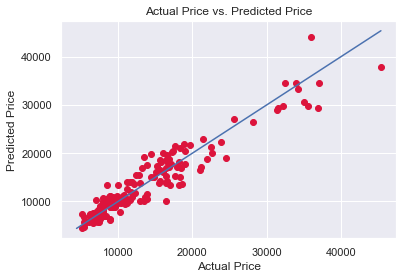

In [46]:
plt.scatter(x=y_train, y=train_data_predictions,c='crimson')
p1 = max(max(train_data_predictions), max(y_train))
p2 = min(min(train_data_predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

In [47]:
# Now lets Evaluate the model with test data.
test_data_prediction = model1.predict(x_test)

In [48]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print('The R squared score is: ',error_score)

The R squared score is:  0.8356388488593949


Text(0.5, 1.0, 'Actual Price vs. Predicted Price')

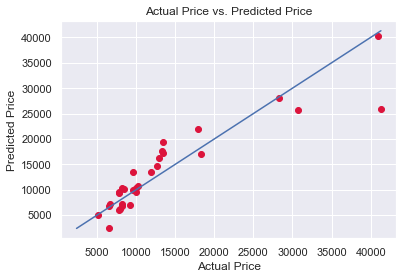

In [49]:
plt.scatter(x=y_test, y=test_data_predictions,c='crimson')
p1 = max(max(test_data_predictions), max(y_test))
p2 = min(min(test_data_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')

In [50]:
df1=pd.DataFrame([["Linear regressor",error_score1],["Lasso Regressor",error_score2]],columns=["models","accuracy"])
df1

,models,accuracy
0,Linear regressor,0.908345
1,Lasso Regressor,0.908323


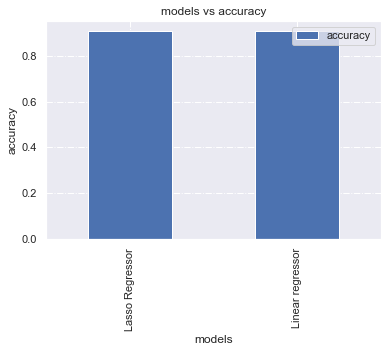

In [51]:
e=pd.DataFrame(df1.groupby('models')['accuracy'].mean())
e.plot.bar(title='models vs accuracy')
plt.xlabel("models")
plt.ylabel("accuracy")
plt.grid(linestyle='-.')


When we compare the predictions of Lasso regression and Linear regression performed by our model is quite similar to each other, with the R-Squared value of approx. 0.91 and 0.83 for training and test data respectively.
So, with these value we can conclude that our model is performing overall quite well, hence there is very little difference in both, so we can consider any of them as our model.